In [21]:
import numpy as np
import scipy as sp
import math as m
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import library_assignment_2 as lib
mat_list = lib.read_matrices('input_matrices.txt',delimiter=',')         #reading matrices from file

Question 1

In [12]:
#Define A and B

A=4*np.eye(6)
A= A+np.diagflat([-1,-1,0,-1,-1],1)+np.diagflat([-1,-1,0,-1,-1],-1)+np.diagflat([-1,-1,-1],3)+np.diagflat([-1,-1,-1],-3)
A= A.tolist()
B = np.array([[2],[1],[2],[2],[1],[2]]).tolist()

#check if they are symmetric
q1_flag = lib.symcheck(A)
if q1_flag == True:
    print("A is symmetric")
else:
    raise ValueError("A is not symmetric")

A is symmetric


In [13]:

#Cholesky Decomposition

A1 = np.copy(A).tolist()    
B1 = np.copy(B).tolist()   
chol_ans = lib.Cholesky_solve(A1,B)


#Gauss Seidel

tolerence_q1 = 1e-6
GS_ans,steps = lib.gauss_seidel(A,B,tolerence_q1) 


#print the results
p=PrettyTable()
p.field_names = ["Variable", "Cholesky", "Gauss Seidel"]

for i in range(len(chol_ans)):
    p.add_row([f"x_{i+1}","{:.6f}".format(chol_ans[i][0]),"{:.7f}".format(GS_ans[i][0])])
print(p)
print("Number of iterations for Gauss Seidel Method : ",steps)


+----------+----------+--------------+
| Variable | Cholesky | Gauss Seidel |
+----------+----------+--------------+
|   x_1    | 1.000000 |  0.9999998   |
|   x_2    | 1.000000 |  0.9999998   |
|   x_3    | 1.000000 |  0.9999999   |
|   x_4    | 1.000000 |  0.9999999   |
|   x_5    | 1.000000 |  0.9999999   |
|   x_6    | 1.000000 |  0.9999999   |
+----------+----------+--------------+
Number of iterations for Gauss Seidel Method :  16


Question 2

In [14]:
#define the matrices

A=[
    [0,4,2,0,1],
    [4,0,4,10,1],
    [2,5,1,3,13],
    [11,3,0,1,2],
    [3,2,7,1,0]
]
B=[[20],[15],[92],[51],[15]]
print("Diagonally dominant metrix check: ",lib.diagonal_dom_check(A))
A_new=lib.make_DD(A,B)
#Solving using the Gauss-Jordan Method

GJ_ans = lib.gauss_jordan_solve(np.copy(A).tolist(),np.copy(B).tolist())

#LU Decomposition

LU_ans = lib.LU_solve(np.copy(A).tolist(),np.copy(B).tolist())

p=PrettyTable()
p.field_names = ["Variable", "Gauss Jordan", "LU Decomposition"]
for i in range(len(GJ_ans)):
    p.add_row([f"x_{i+1}","{:.4f}".format(GJ_ans[i][0]),"{:.4f}".format(LU_ans[i][0])])
   
print(p)


Diagonally dominant metrix check:  False
+----------+--------------+------------------+
| Variable | Gauss Jordan | LU Decomposition |
+----------+--------------+------------------+
|   x_1    |    2.6746    |      2.6746      |
|   x_2    |    3.7119    |      3.7119      |
|   x_3    |   -0.0533    |     -0.0533      |
|   x_4    |   -0.0744    |     -0.0744      |
|   x_5    |    5.2591    |      5.2591      |
+----------+--------------+------------------+


Question 3

In [15]:
A = np.copy(mat_list[4]).tolist()
B = np.copy(mat_list[5]).tolist()

# The guess is taken to be the zero vector
ycg,_step_ = lib.conjugate_gradient_solve(A,B,[[0],[0],[0],[0],[0],[0]],1e-6)
print("Number of Iterations for Conjugate Gradient Method is",_step_,"which equals length of A")

p=PrettyTable()
p.field_names = ["Variable", "Solution"]
for i in range(len(ycg)):
    p.add_row([f"x_{i+1}","{:.4f}".format(ycg[i][0])])

print("Solution for the given system of linear equations are:\n")
print(p)
print("To find the inverse of A using conjugate gradient, we need to set the matrix B as an Identity matrix,")
print("the guess used here is a matrix with all the elements 1 ")

Number of Iterations for Conjugate Gradient Method is 6 which equals length of A
Solution for the given system of linear equations are:

+----------+----------+
| Variable | Solution |
+----------+----------+
|   x_1    | -0.7245  |
|   x_2    |  0.2177  |
|   x_3    |  0.9666  |
|   x_4    | -0.6857  |
|   x_5    | -0.0382  |
|   x_6    |  0.6488  |
+----------+----------+
To find the inverse of A using conjugate gradient, we need to set the matrix B as an Identity matrix,
the guess used here is a matrix with all the elements 1 


In [16]:
#inverse
B = np.eye(6).tolist()
guess = np.ones((6,1)).tolist()

print("The matrix A :\n")
print(np.array(A))
print("\n")

A_inv,_step_ = lib.conjugate_gradient_solve(A,B,guess,1e-6)

print("The Number of Iterations for Conjugate Gradient Method is",_step_,"which is same as the length of the A")
print("A inverse:\n")
print(np.round(A_inv,4))
print("\n")

print("For the verification of the result the product of A and A_inv is shown below:\n")
print(np.round(np.matmul(A,A_inv)))




The matrix A :

[[ 2. -1.  0.  0.  0.  0.]
 [-1.  4. -1.  0. -1.  0.]
 [ 0. -1.  4.  0.  0. -1.]
 [ 0.  0.  0.  2. -1.  0.]
 [ 0. -1.  0. -1.  4. -1.]
 [ 0.  0. -1.  0. -1.  4.]]


The Number of Iterations for Conjugate Gradient Method is 6 which is same as the length of the A
A inverse:

[[0.5868 0.1735 0.0501 0.0286 0.0572 0.0268]
 [0.1735 0.347  0.1002 0.0572 0.1145 0.0537]
 [0.0501 0.1002 0.297  0.0268 0.0537 0.0877]
 [0.0286 0.0572 0.0268 0.5868 0.1735 0.0501]
 [0.0572 0.1145 0.0537 0.1735 0.347  0.1002]
 [0.0268 0.0537 0.0877 0.0501 0.1002 0.297 ]]


For the verification of the result the product of A and A_inv is shown below:

[[ 1.  0. -0. -0.  0. -0.]
 [-0.  1.  0. -0. -0. -0.]
 [-0. -0.  1.  0.  0.  0.]
 [-0.  0. -0.  1.  0. -0.]
 [-0. -0. -0. -0.  1.  0.]
 [-0.  0. -0.  0.  0.  1.]]


Question 4

In [17]:
#defining the matrices
def Kronecker_delta(i, j):
    if i == j:
        return 1
    else:
        return 0
#defining the matrix A
def A_ij(i, j):
    m = 0.2 
    num = 0.5 * (Kronecker_delta(i + 1, j) + Kronecker_delta(i - 1, j) - 2 * Kronecker_delta(i, j)) + m*m *Kronecker_delta(i, j)
    return num



def matrix_multiply_fn_with_matrix(A_ij, B):
    rows_A = len(B)
    cols_A = len(B[0])

    result = []
    for i in range(rows_A):
        row = []
        for j in range(cols_A):
            element = sum(A_ij(i, k) * B[k][j] for k in range(len(B)))
            row.append(element)
        result.append(row)

    return result


def conjugate_gradient_solve(A: callable,B: list,guess: list,T: float,n: int):
    x0=guess
    r0 = np.add(B, -1 * np.array(matrix_multiply_fn_with_matrix(A, x0)))
    d0 = np.copy(r0)
    i=1
    reslist = [np.linalg.norm(r0)]
    while True:
        alpha1 = np.matmul(np.transpose(r0), r0) / np.matmul(np.transpose(d0), np.array(matrix_multiply_fn_with_matrix(A, d0)))
        x1 = np.add(x0, alpha1[0][0]*d0)
        r1 = np.add(r0, -1 * alpha1[0][0] * np.array(matrix_multiply_fn_with_matrix(A, d0)))
        reslist.append(np.linalg.norm(r1))
        if np.linalg.norm(r1) < T and i<=n:
            return x1.tolist(),reslist,i
        elif i>n:
            print("Maybe the matrix A dosent satisfy the conditions for the Conjugate Gradient Method")
            return None
        else: 
            beta1 = np.matmul(np.transpose(r1), r1) / np.matmul(np.transpose(r0), r0)
            d1 = np.add(r1, beta1[0][0] * d0)
            x0 = x1
            del x1
            r0 = r1
            del r1
            d0 = d1
            del d1
            i+=1



In [18]:

n=50

inv,res,iter = conjugate_gradient_solve(A_ij,np.eye(50).tolist(),[[1] for i in range(50)],1e-6,50)

In [19]:

print("Inverse of the Matrix A:\n")
print(np.array(inv))
print("\n")
print("The Number of Iterations for Conjugate Gradient Method is",iter,"which is same as the length of the A")

print("Product of A and A_inv:\n")
print(np.round(matrix_multiply_fn_with_matrix(A_ij,inv)))

# The Matrix is too large to be printed, so its saved in a file
np.savetxt('A_inv.txt',np.round(np.array(inv),6),delimiter='\t',fmt='%1.6f')

print("\n")
print("The inverse of the Matrix A is saved in the file A_inv.txt")

Inverse of the Matrix A:

[[-2.11578492 -2.06230706 -1.84384462 ... -1.5936755  -1.13901763
  -0.59323835]
 [-2.06230706 -3.95962955 -3.54018167 ... -3.05985695 -2.18691384
  -1.13901763]
 [-1.84384462 -3.54018167 -4.95330419 ... -4.28124985 -3.05985695
  -1.5936755 ]
 ...
 [-1.5936755  -3.05985695 -4.28124985 ... -4.95330419 -3.54018167
  -1.84384462]
 [-1.13901763 -2.18691384 -3.05985695 ... -3.54018167 -3.95962955
  -2.06230706]
 [-0.59323835 -1.13901763 -1.5936755  ... -1.84384462 -2.06230706
  -2.11578492]]


The Number of Iterations for Conjugate Gradient Method is 50 which is same as the length of the A
Product of A and A_inv:

[[ 1.  0. -0. ...  0.  0.  0.]
 [ 0.  1.  0. ...  0.  0.  0.]
 [-0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  1.  0. -0.]
 [ 0.  0.  0. ...  0.  1.  0.]
 [ 0.  0.  0. ... -0.  0.  1.]]


The inverse of the Matrix A is saved in the file A_inv.txt


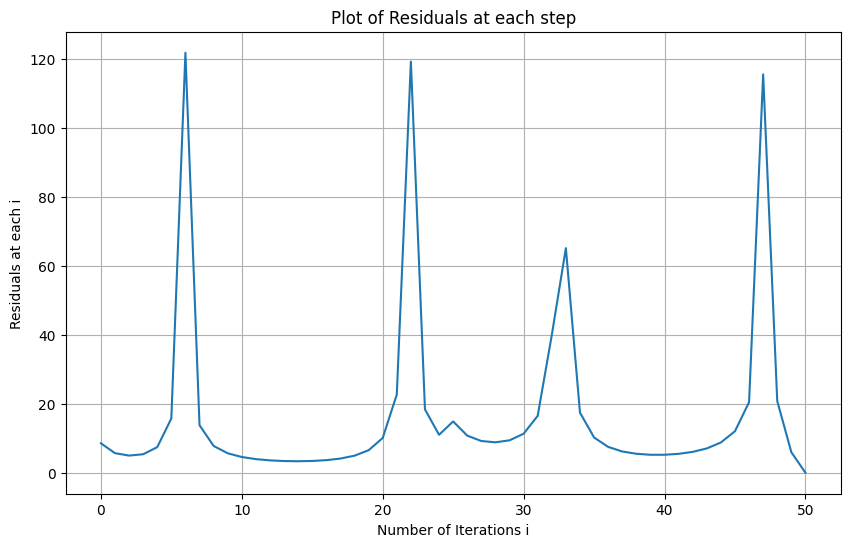

In [22]:
plt.figure(figsize=(10,6))
plt.plot([i for i in range(n+1)],res)
plt.xlabel("Number of Iterations i")
plt.ylabel("Residuals at each i")
plt.title("Plot of Residuals at each step")
plt.grid()
plt.show()